In [1]:
import pandas as pd
import glob
import re
from functools import reduce

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
import nltk

## 파일 병합

In [3]:
all_files = glob.glob("my*.xls")
all_files

['myCabinetExcelData (1).xls',
 'myCabinetExcelData (2).xls',
 'myCabinetExcelData (3).xls',
 'myCabinetExcelData (4).xls',
 'myCabinetExcelData (5).xls',
 'myCabinetExcelData (6).xls',
 'myCabinetExcelData (7).xls',
 'myCabinetExcelData (8).xls',
 'myCabinetExcelData (9).xls',
 'myCabinetExcelData.xls']

In [5]:
all_files_data = [] # 저장할 리스트

for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)
    
all_files_data[0]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2015
1,NaN,2,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2016
2,NaN,3,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016
3,NaN,4,Parallel computing for preserving privacy usin...,"Yaji, Sharath; Neelima, B.",Inderscience,2018
4,NaN,5,NoSQL databases for big data,"Oussous, Ahmed; Benjelloun, Fatima-Zahra; Lahc...",Inderscience,2017
...,...,...,...,...,...,...
95,NaN,96,Smart city big data analytics: An advanced review,"Soomro, Kamran; Bhutta, Muhammad Nasir Mumtaz;...",John Wiley & Sons Ltd,2019
96,NaN,97,A watchdog approach - name-matching algorithm ...,"Kirubakaran, Anusuya; Aramudhan, M.",Inderscience,2018
97,NaN,98,An intelligent approach to Big Data analytics ...,"Verma, Neha; Singh, Jatinder",Emerald Group Publishing Limited,2017
98,NaN,99,How organisations leverage Big Data: a maturit...,"Comuzzi, Marco; Patel, Anit",Emerald Group Publishing Limited,2016


In [6]:
all_files_data_concat = pd.concat(all_files_data, axis=0, ignore_index=True)
all_files_data_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2015
1,NaN,2,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2016
2,NaN,3,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016
3,NaN,4,Parallel computing for preserving privacy usin...,"Yaji, Sharath; Neelima, B.",Inderscience,2018
4,NaN,5,NoSQL databases for big data,"Oussous, Ahmed; Benjelloun, Fatima-Zahra; Lahc...",Inderscience,2017
...,...,...,...,...,...,...
995,NaN,96,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C.",unknown,2017
996,NaN,97,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2017
997,NaN,98,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2016
998,NaN,99,Speed Up Big Data Analytics by Unveiling the S...,"Wang, J.; Zhang, X.; Yin, J.; Wang, R.; Wu, H....",unknown,2018


In [8]:
all_files_data_concat.to_csv('riss_bigdata.csv', encoding='utf-8', index=False)

## 데이터 전처리 (Pre-processing)

In [10]:
# 제목 추출
all_title = all_files_data_concat['제목']
all_title

0      Guest Editorial: Big Media Data: Understanding...
1      Guest Editorial: Big Scholar Data Discovery an...
2        Guest Editorial: Big Data Analytics and the Web
3      Parallel computing for preserving privacy usin...
4                           NoSQL databases for big data
                             ...                        
995    Guest Editorial: Big Media Data: Understanding...
996    Guest Editorial: Big Scholar Data Discovery an...
997    Guest Editorial: Big Media Data: Understanding...
998    Speed Up Big Data Analytics by Unveiling the S...
999          Architecting Time-Critical Big-Data Systems
Name: 제목, Length: 1000, dtype: object

In [11]:
stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

In [12]:
words = []

for title in all_title:
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title))
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords] # 익명함수 클로저
    # print(EnWordsTokenStop)
#     def call(var):
#         result = []
#         for w in EnWordsToken:
#             if w not in stopwords:
#                 result.append(w)
#         return result
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
#     def call2(EnWordsTokenStop):
#         result2 = []
#         for w2 in EnWordsTokenStop:
#             result2.append(lemma.lemmatize(w2))
#         return result2
    # print(EnWordsTokenStopLemma)
    words.append(EnWordsTokenStopLemma)
words

[['guest',
  'editorial',
  'big',
  'medium',
  'data',
  'understanding',
  'search',
  'mining',
  'part'],
 ['guest',
  'editorial',
  'big',
  'scholar',
  'data',
  'discovery',
  'collaboration'],
 ['guest', 'editorial', 'big', 'data', 'analytics', 'web'],
 ['parallel',
  'computing',
  'preserving',
  'privacy',
  'using',
  'k',
  'anonymisation',
  'algorithm',
  'big',
  'data'],
 ['nosql', 'database', 'big', 'data'],
 ['computation',
  'migration',
  'new',
  'approach',
  'execute',
  'big',
  'data',
  'bioinformatics',
  'workflow'],
 ['towards',
  'real',
  'time',
  'big',
  'data',
  'analytics',
  'platform',
  'health',
  'application'],
 ['new',
  'approach',
  'accurate',
  'distributed',
  'cluster',
  'analysis',
  'big',
  'data',
  'competitive',
  'k',
  'mean'],
 ['five', 'layer', 'architecture', 'big', 'data', 'processing', 'analytics'],
 ['towards',
  'max',
  'min',
  'fair',
  'resource',
  'allocation',
  'stream',
  'big',
  'data',
  'analytics',
  's

## 데이터 탐색

### 단어 빈도 탐색

In [15]:
words2 = reduce(lambda x, y: x + y, words)
print(type(words2))
words2[:10]

<class 'list'>


['guest',
 'editorial',
 'big',
 'medium',
 'data',
 'understanding',
 'search',
 'mining',
 'part',
 'guest']

In [17]:
count = Counter(words2)
count

Counter({'guest': 12,
         'editorial': 17,
         'big': 1354,
         'medium': 11,
         'data': 1645,
         'understanding': 11,
         'search': 7,
         'mining': 40,
         'part': 1,
         'scholar': 3,
         'discovery': 13,
         'collaboration': 5,
         'analytics': 137,
         'web': 9,
         'parallel': 5,
         'computing': 25,
         'preserving': 2,
         'privacy': 17,
         'using': 57,
         'k': 7,
         'anonymisation': 1,
         'algorithm': 17,
         'nosql': 4,
         'database': 11,
         'computation': 2,
         'migration': 4,
         'new': 38,
         'approach': 44,
         'execute': 1,
         'bioinformatics': 2,
         'workflow': 3,
         'towards': 12,
         'real': 14,
         'time': 17,
         'platform': 19,
         'health': 37,
         'application': 25,
         'accurate': 3,
         'distributed': 18,
         'cluster': 2,
         'analysis': 67,
         

In [18]:
word_count = dict()

In [19]:
count.most_common(50)

[('data', 1645),
 ('big', 1354),
 ('analytics', 137),
 ('analysis', 67),
 ('based', 62),
 ('using', 57),
 ('system', 50),
 ('science', 50),
 ('management', 48),
 ('challenge', 47),
 ('approach', 44),
 ('mining', 40),
 ('new', 38),
 ('research', 38),
 ('health', 37),
 ('model', 37),
 ('cloud', 34),
 ('smart', 34),
 ('learning', 33),
 ('opportunity', 31),
 ('processing', 30),
 ('technology', 28),
 ('small', 27),
 ('framework', 26),
 ('information', 26),
 ('computing', 25),
 ('application', 25),
 ('driven', 24),
 ('social', 24),
 ('issue', 24),
 ('quality', 23),
 ('network', 23),
 ('deal', 23),
 ('knowledge', 22),
 ('efficient', 22),
 ('review', 22),
 ('use', 22),
 ('era', 22),
 ('healthcare', 21),
 ('storage', 21),
 ('service', 21),
 ('perspective', 21),
 ('open', 20),
 ('platform', 19),
 ('survey', 19),
 ('making', 19),
 ('process', 19),
 ('distributed', 18),
 ('large', 18),
 ('environment', 18)]

In [20]:
for tag, counts in count.most_common(50):
    if (len(str(tag)) > 1):
        word_count[tag] = counts
print(word_count)

{'data': 1645, 'big': 1354, 'analytics': 137, 'analysis': 67, 'based': 62, 'using': 57, 'system': 50, 'science': 50, 'management': 48, 'challenge': 47, 'approach': 44, 'mining': 40, 'new': 38, 'research': 38, 'health': 37, 'model': 37, 'cloud': 34, 'smart': 34, 'learning': 33, 'opportunity': 31, 'processing': 30, 'technology': 28, 'small': 27, 'framework': 26, 'information': 26, 'computing': 25, 'application': 25, 'driven': 24, 'social': 24, 'issue': 24, 'quality': 23, 'network': 23, 'deal': 23, 'knowledge': 22, 'efficient': 22, 'review': 22, 'use': 22, 'era': 22, 'healthcare': 21, 'storage': 21, 'service': 21, 'perspective': 21, 'open': 20, 'platform': 19, 'survey': 19, 'making': 19, 'process': 19, 'distributed': 18, 'large': 18, 'environment': 18}


In [21]:
del word_count['big']
del word_count['data']

In [22]:
key_list = list(word_count.keys())
key_list[:10]

['analytics',
 'analysis',
 'based',
 'using',
 'system',
 'science',
 'management',
 'challenge',
 'approach',
 'mining']

In [38]:
sorted_keys_list = sorted(key_list) # sorted(key_list, reverse=True)
sorted_keys_list[:10]

['analysis',
 'analytics',
 'application',
 'approach',
 'based',
 'challenge',
 'cloud',
 'computing',
 'deal',
 'distributed']

In [23]:
sorted_values = sorted(word_count.values(), reverse=True)
sorted_values[:10]

[137, 67, 62, 57, 50, 50, 48, 47, 44, 40]

In [24]:
dict2 = {"name" : ["홍길동", "김길동", "송길동"], "age" : [100, 200, 300]}

In [25]:
dict2.keys()

dict_keys(['name', 'age'])

In [26]:
dict3 = {"분석" : 245, "챌린지" : 100}

In [28]:
keys3 = dict3.keys()
keys3

dict_keys(['분석', '챌린지'])

In [31]:
list_keys3 = list(keys3)
list_keys3

['분석', '챌린지']

In [32]:
sorted(list_keys3, reverse=True)

['챌린지', '분석']

In [33]:
list_values3 = list(dict3.values())
sorted(list_values3, reverse=True)

[245, 100]

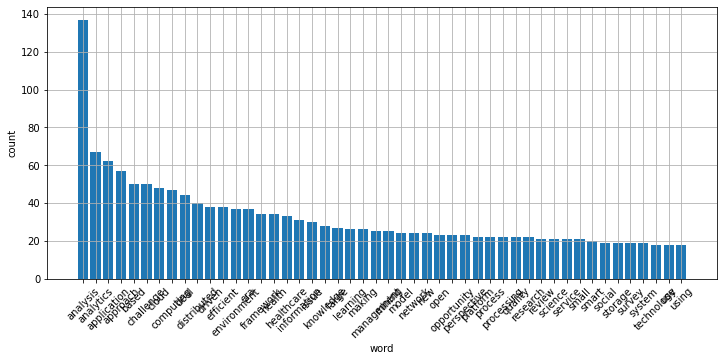

In [39]:
plt.figure(figsize=(12, 5))
plt.xlabel('word')
plt.ylabel('count')
plt.grid(True)

plt.bar(range(len(word_count)), sorted_values)
plt.xticks(range(len(word_count)), sorted_keys_list, rotation='45')
plt.show()